In [1]:
import os, shutil

In [52]:
# Path to the directory of original dataset 
original_dataset_dir = '/Users/Mohammadreza/Desktop/Python Tutorial 1/DL with Keras/Kaggle original data /train'

In [53]:
os.makedirs(original_dataset_dir,exist_ok=True)

In [13]:
# Directory of small dataset 
base_dir = '/Users/Mohammadreza/Desktop/Python Tutorial 1/DL with Keras/cats and dogs small' 

In [19]:
os.makedirs(base_dir,exist_ok=True)

In [20]:
# Directory of training data 
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir,exist_ok=True)

In [23]:
# Directory of test data
test_dir = os.path.join(base_dir, 'test')
os.makedirs(test_dir,exist_ok=True)

In [24]:
# Directory of validation data
validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(validation_dir,exist_ok=True)

In [26]:
# Directory of cat images in training data
train_cats_dir = os.path.join(train_dir, 'cats')
os.makedirs(train_cats_dir,exist_ok=True)

In [27]:
# Directory of dog images in training data
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.makedirs(train_dogs_dir,exist_ok=True)

In [28]:
# Directory of cat images in validation data
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.makedirs(validation_cats_dir,exist_ok=True)

In [29]:
# Directory of dog images in validation data
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.makedirs(validation_dogs_dir,exist_ok=True)

In [30]:
# Directory of cat images in test data
test_cats_dir = os.path.join(test_dir, 'cats')
os.makedirs(test_cats_dir,exist_ok=True)

In [31]:
# Directory of dog images in test data
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.makedirs(test_dogs_dir,exist_ok=True)

In [55]:
# Copies the first 1,000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [56]:
# Copies the next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [57]:
# Copies the next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [58]:
# Copies the first 1,000 dog images to train_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [59]:
# Copies the next 500 dog images to validation_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [60]:
# Copies the next 500 dog images to test_cats_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [61]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [62]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500


In [63]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [64]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [65]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [66]:
from keras import optimizers

In [67]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [68]:
from keras.preprocessing.image import ImageDataGenerator

In [69]:
# Rescaling the images by 1/255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
# Resize all images to 150 × 150 and assign binary labels
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [71]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [73]:
for data_batch, labels_batch in train_generator:
        print('data batch shape:', data_batch.shape)
        print('labels batch shape:', labels_batch.shape)
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [75]:
# Fitting the model to data 
history = model.fit_generator(train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/3
100/100 [==============================] - 156s 2s/step - loss: 0.6318 - acc: 0.6535 - val_loss: 0.6191 - val_acc: 0.6620
Epoch 2/3
100/100 [==============================] - 161s 2s/step - loss: 0.5925 - acc: 0.6990 - val_loss: 0.6076 - val_acc: 0.6690
Epoch 3/3
100/100 [==============================] - 155s 2s/step - loss: 0.5642 - acc: 0.7150 - val_loss: 0.6279 - val_acc: 0.6510


In [76]:
model.save('cats_and_dogs_small_1.h5')

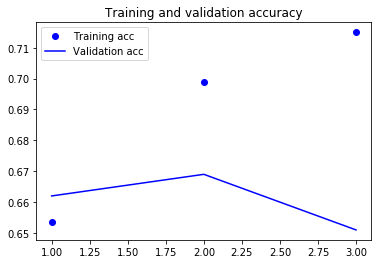

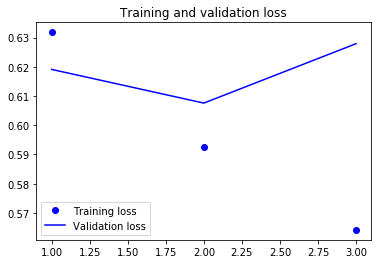

In [78]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [79]:
# Data augmentation 
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

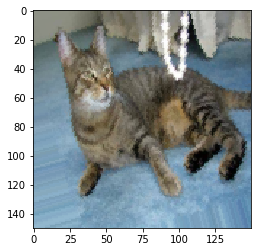

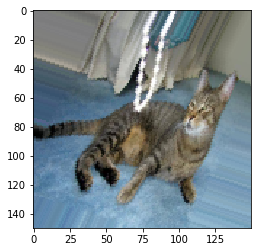

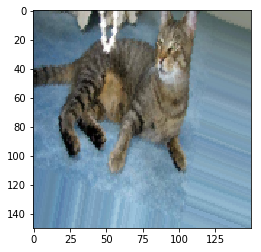

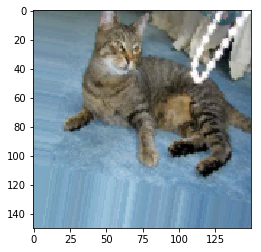

In [89]:
# Dispalying one of the images anf its augmented versions  
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))
x = image.img_to_array(img)
# x =tf.keras.preprocessing.image.img_to_array(img,data_format=None)
x = x.reshape((1,) + x.shape)
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [90]:
# Defining the model using one dropout  
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [91]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

In [92]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [93]:
train_generator = train_datagen.flow_from_directory(train_dir,
target_size=(150, 150),
batch_size=32,
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [94]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1000 images belonging to 2 classes.


In [96]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/3
100/100 [==============================] - 276s 3s/step - loss: 0.6950 - acc: 0.5059 - val_loss: 0.6869 - val_acc: 0.5019
Epoch 2/3
100/100 [==============================] - 244s 2s/step - loss: 0.6830 - acc: 0.5600 - val_loss: 0.6605 - val_acc: 0.6079
Epoch 3/3
100/100 [==============================] - 248s 2s/step - loss: 0.6711 - acc: 0.5891 - val_loss: 0.6505 - val_acc: 0.6148


In [ ]:
model.save('cats_and_dogs_small_2.h5')

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()